Analysis on Stellar Classification dataset using Machine learning presentation PDF

https://drive.google.com/file/d/1kCQZF-stkK2xs-oEWxxbjOq7hB5zcEka/view?usp=share_link

# Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [ ]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Data

In [ ]:
data=pd.read_excel("Astronomy.xlsx")

In [ ]:
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class_g_s,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81034,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
81035,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
81036,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
81037,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


# EDA

In [ ]:
a = data[{'obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID'}]
a

In [ ]:
hm = a.head(100)
hm

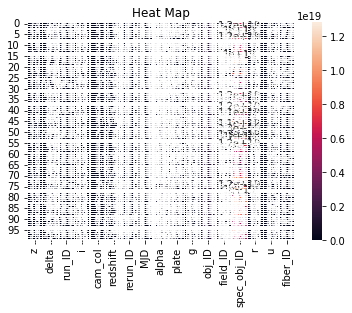

In [ ]:
ax = sns.heatmap( hm , linewidth = 0.25 , annot = True)
  
plt.title( "Heat Map" )
plt.show()

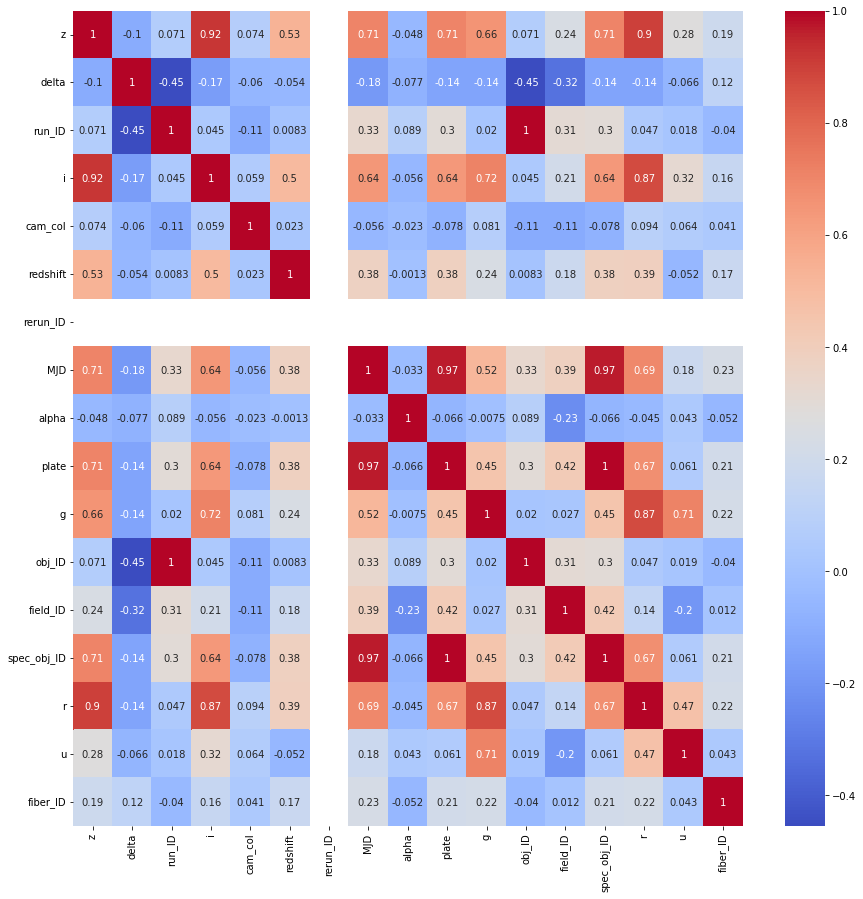

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(hm.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

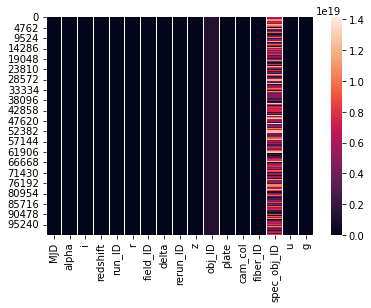

In [ ]:
sns.heatmap(a)

In [ ]:
b = data[{'alpha','delta','u','g','r','i','z','redshift','plate','MJD'}]
b

,r,MJD,z,delta,redshift,plate,alpha,g,i,u
0,20.39501,56354,18.79371,32.494632,0.634794,5812,135.689107,22.27530,19.16573,23.87882
1,22.58444,58158,21.61427,31.274185,0.779136,10445,144.826101,22.83188,21.16812,24.77759
2,20.60976,55592,18.94827,35.582444,0.644195,4576,142.188790,22.66389,19.34857,25.26307
3,21.61162,58039,19.25010,-0.402828,0.932346,9149,338.741038,23.77656,20.50454,22.13682
4,16.49747,56187,15.54461,21.183866,0.116123,6121,345.282593,17.58028,15.97711,19.43718
...,...,...,...,...,...,...,...,...,...,...
99995,21.90404,57749,20.73569,-2.594074,0.000000,9374,39.620709,22.97586,21.30548,22.16759
99996,20.45003,56934,19.41526,19.798874,0.404895,7626,29.493819,22.38628,19.75759,22.69118
99997,18.20428,54535,17.35221,15.700707,0.143366,2764,224.587407,19.26997,17.69034,21.16916
99998,19.91386,56368,18.62482,46.660365,0.455040,6751,212.268621,21.63757,19.07254,25.35039


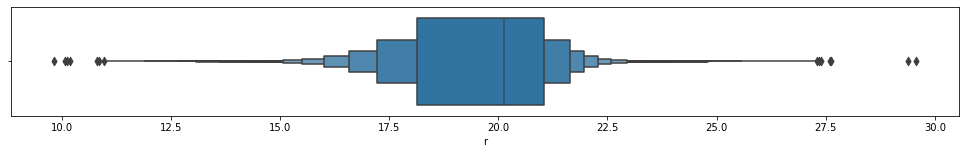

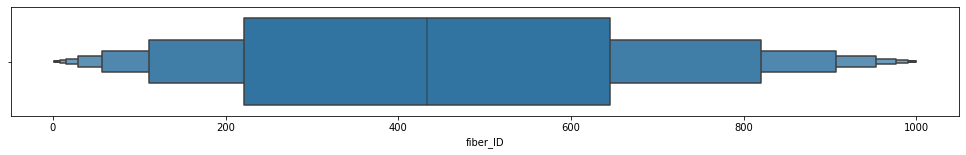

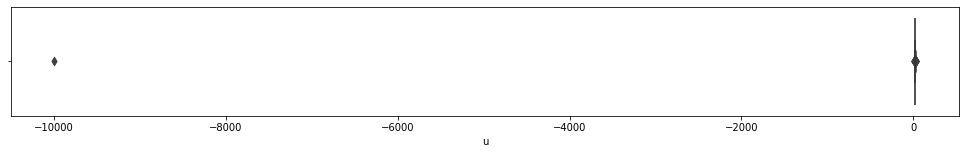

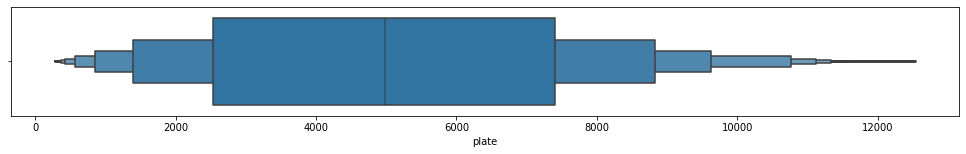

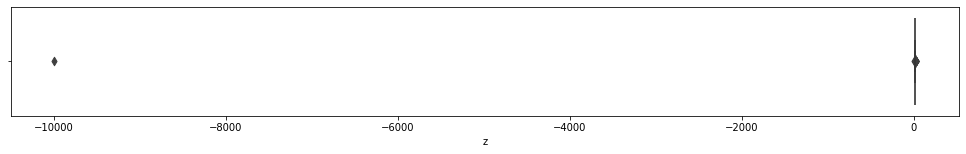

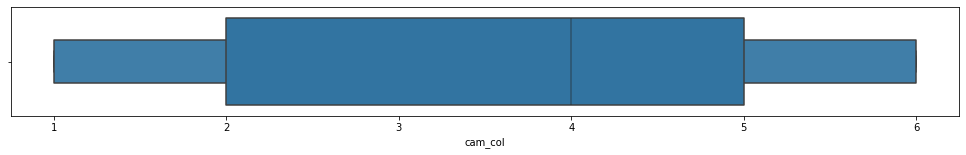

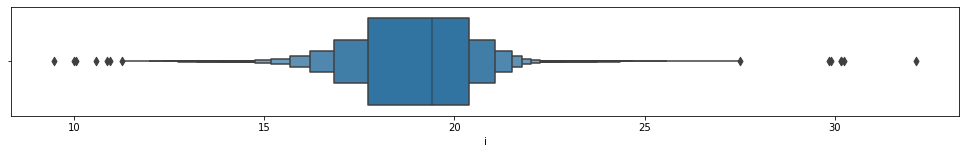

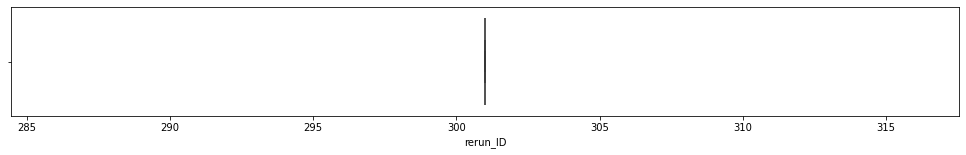

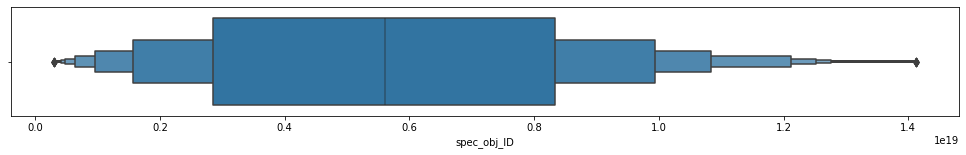

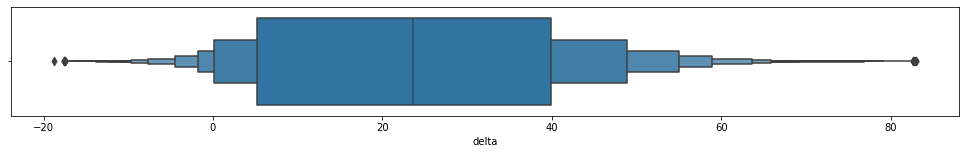

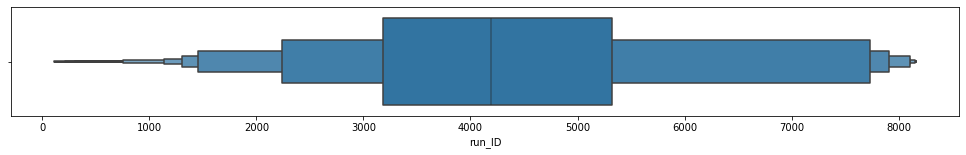

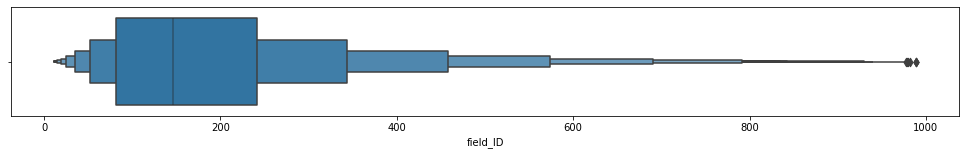

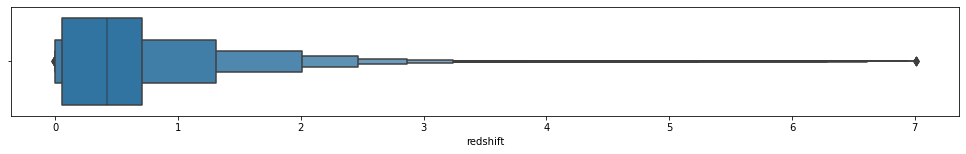

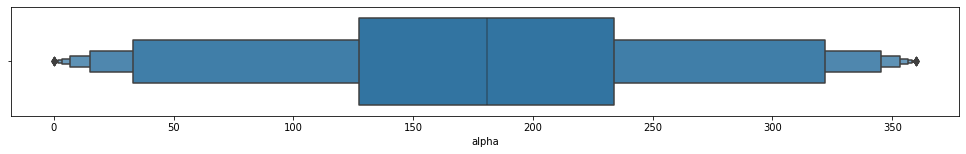

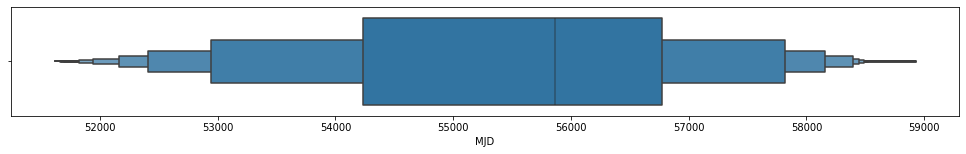

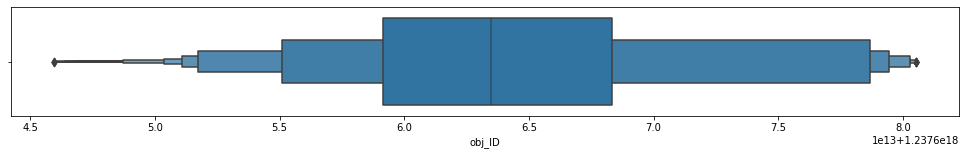

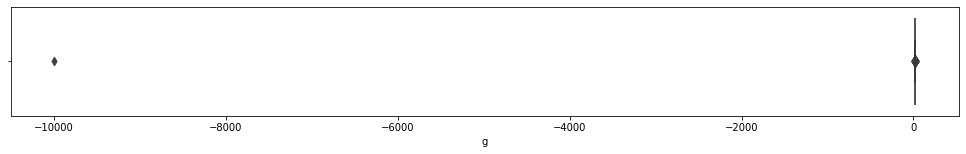

In [ ]:
for column in a:
        plt.figure(figsize=(17,2))
        sns.boxenplot(data=a, x=column)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


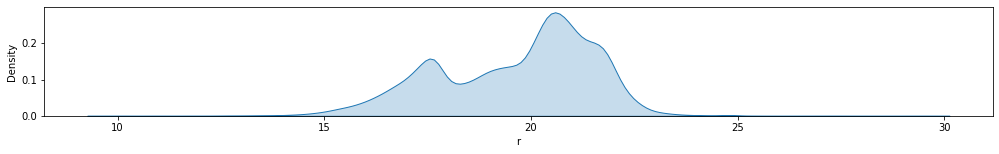

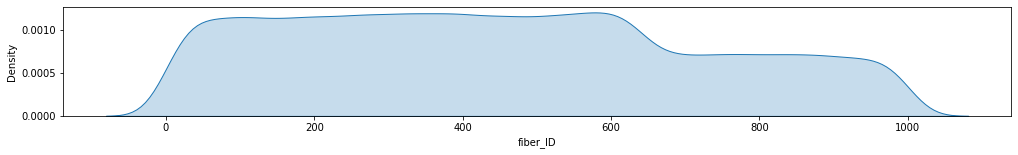

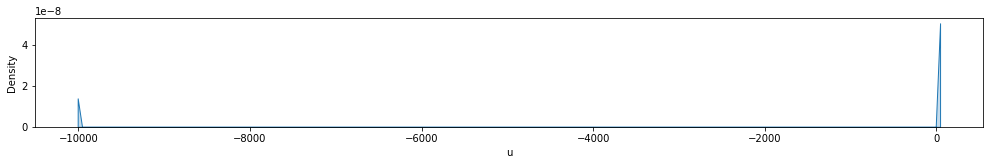

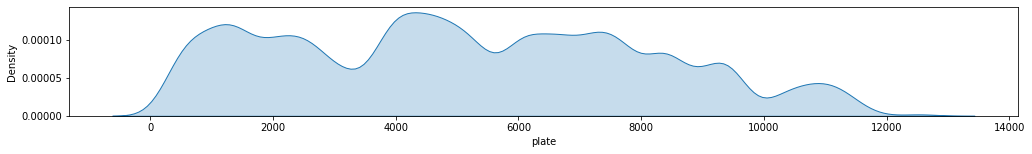

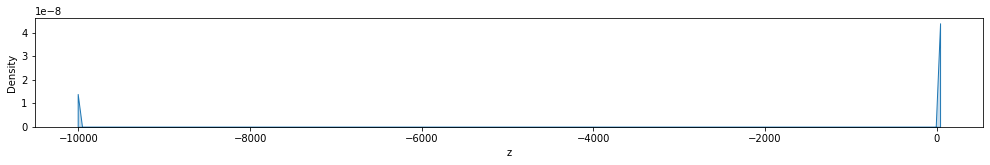

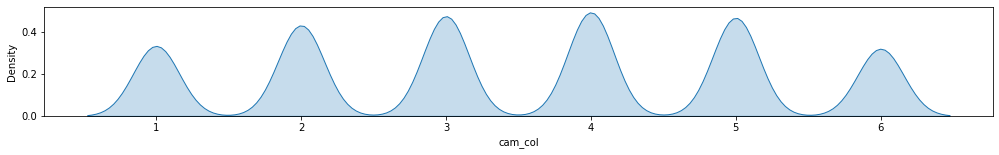

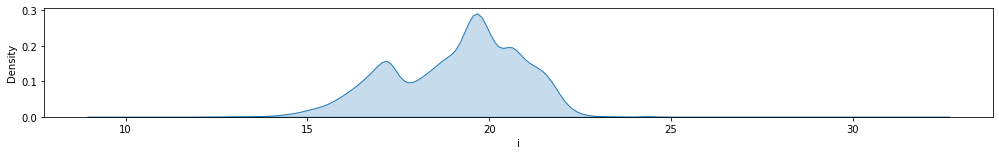

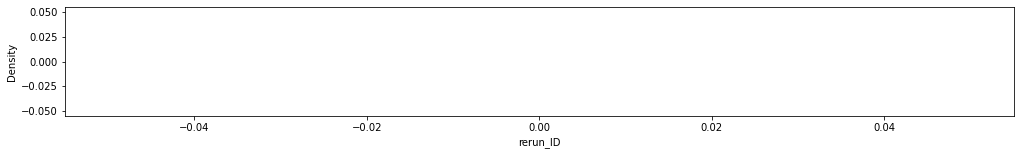

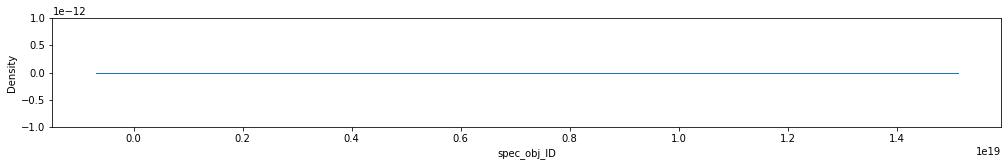

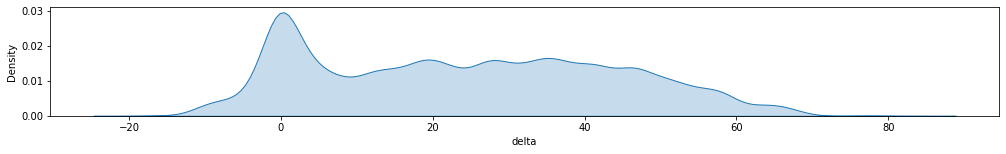

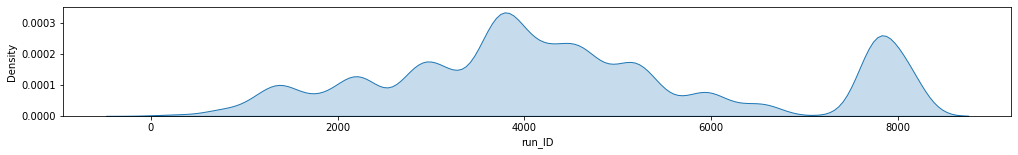

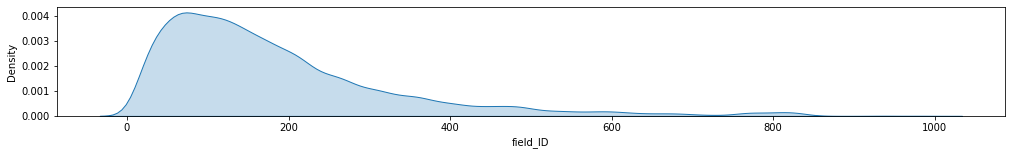

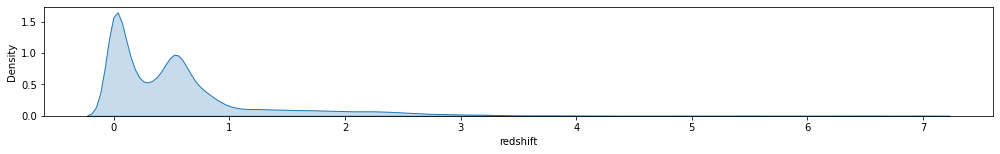

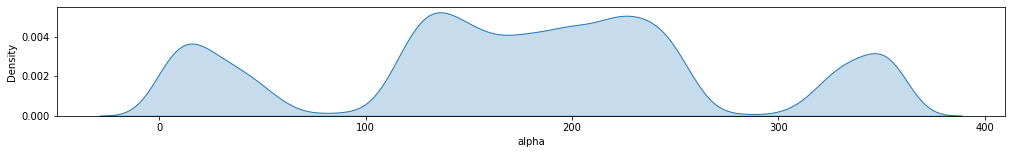

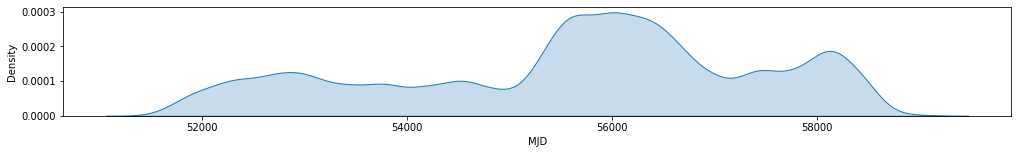

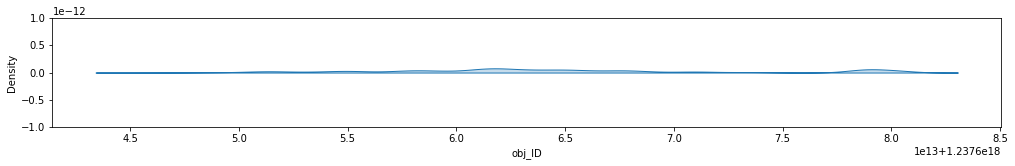

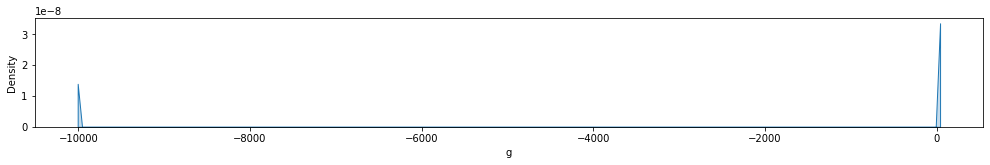

In [ ]:
for column in a:
        plt.figure(figsize=(17,2))
        sns.kdeplot(data=a, x=column , shade = True)

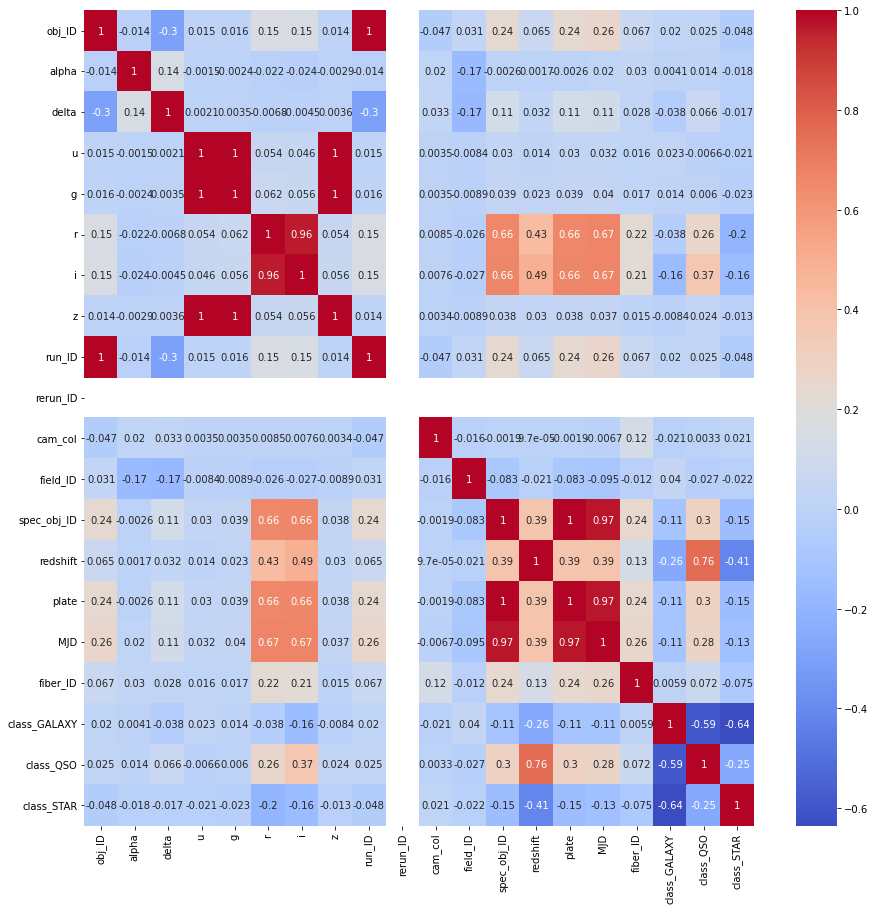

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

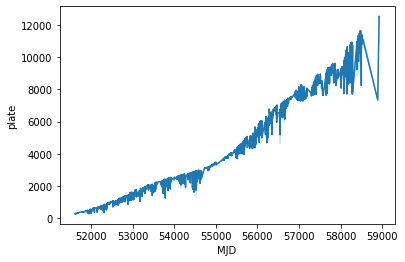

In [ ]:
sns.lineplot(x=data['MJD'],y=data['plate'])

In [ ]:
rs= data[{'u','g','r','i','z','redshift'}]
rst=rs.head(2000)
rst

,redshift,u,r,g,z,i
0,0.634794,23.87882,20.39501,22.27530,18.79371,19.16573
1,0.779136,24.77759,22.58444,22.83188,21.61427,21.16812
2,0.644195,25.26307,20.60976,22.66389,18.94827,19.34857
3,0.932346,22.13682,21.61162,23.77656,19.25010,20.50454
4,0.116123,19.43718,16.49747,17.58028,15.54461,15.97711
...,...,...,...,...,...,...
1995,0.094708,19.09841,16.18878,17.12381,15.38921,15.75042
1996,0.089573,19.77804,16.65368,17.57123,15.84733,16.19880
1997,2.566459,20.86507,20.13651,20.41050,19.99699,20.06677
1998,0.694735,23.43694,22.36670,23.94206,19.80723,20.84963


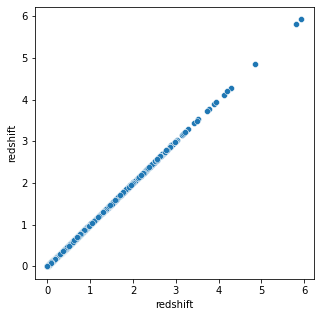

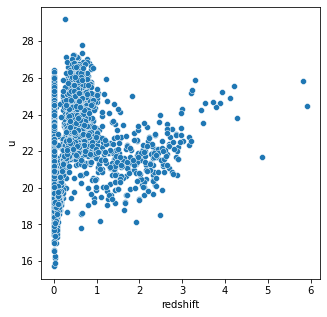

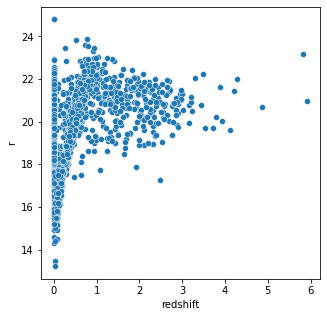

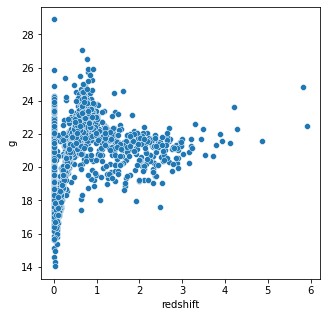

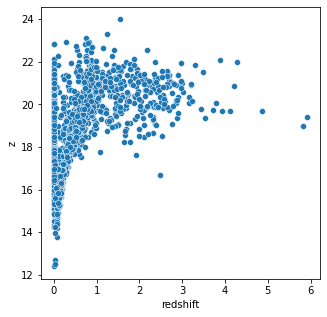

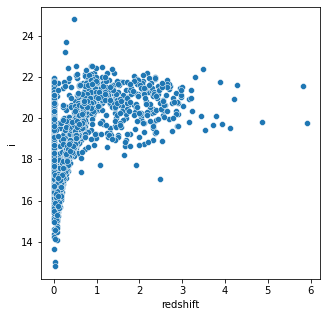

In [ ]:
for column in rst:
        plt.figure(figsize=(5,5))
        sns.scatterplot(data=rst, y=column , x= 'redshift')

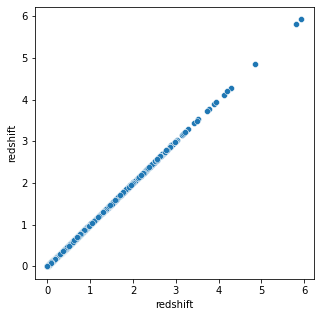

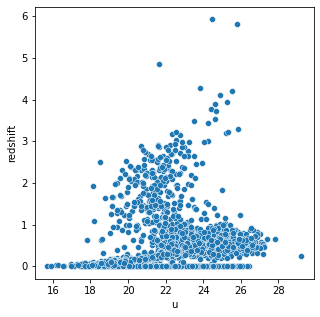

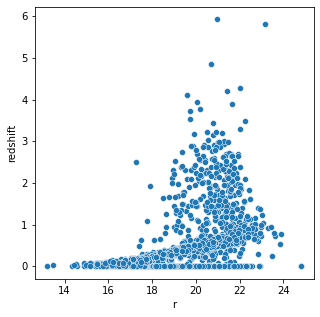

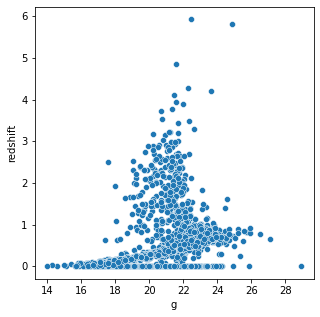

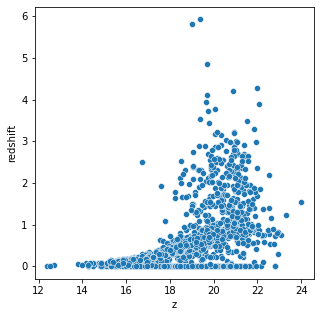

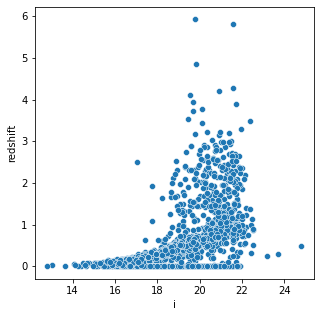

In [ ]:
for column in rst:
        plt.figure(figsize=(5,5))
        sns.scatterplot(data=rst, x=column , y= 'redshift')

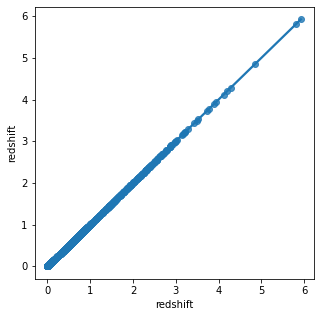

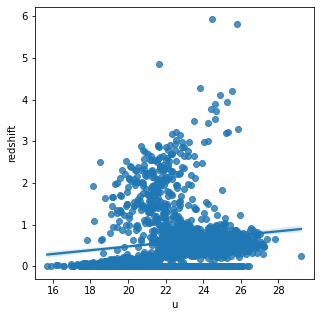

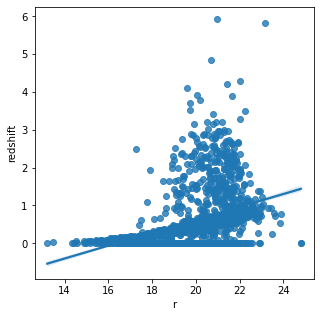

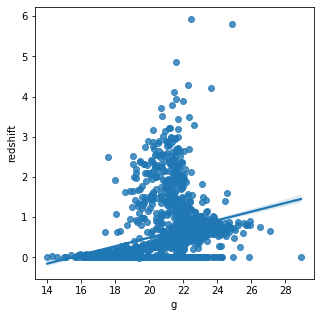

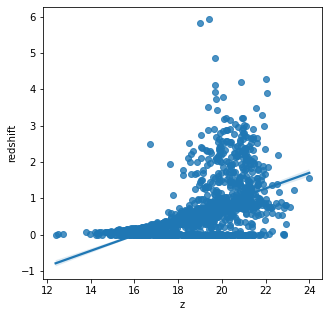

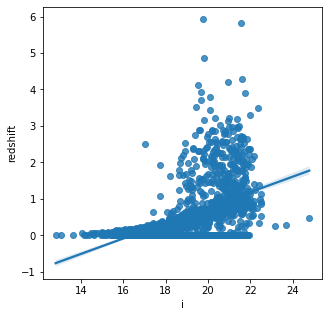

In [ ]:
for column in rst:
        plt.figure(figsize=(5,5))
        sns.regplot(data=rst, x=column , y= 'redshift')

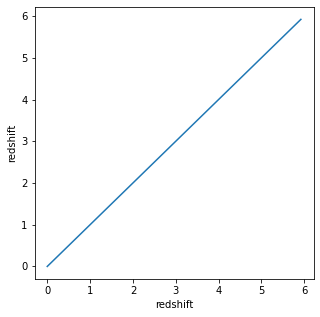

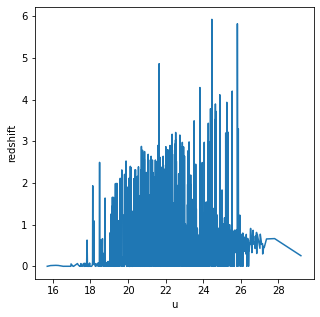

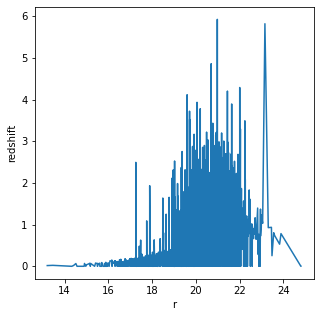

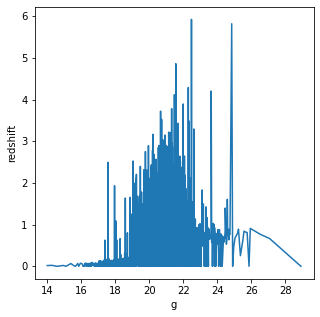

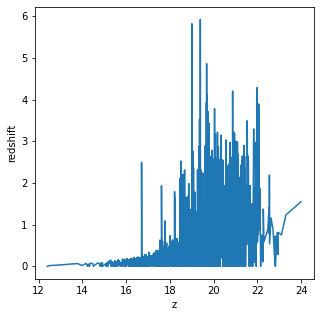

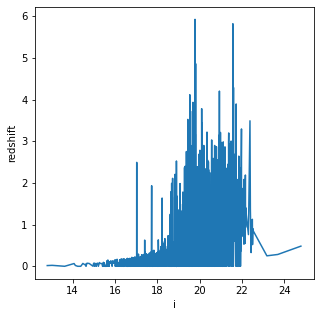

In [ ]:
for column in rst:
        plt.figure(figsize=(5,5))
        sns.lineplot(data=rst, x=column , y= 'redshift')

In [ ]:
for column in rst:
        plt.figure(figsize=(20,4))
        sns.kdeplot(data=rst, x=column , hue = 'redshift' , shade = True)

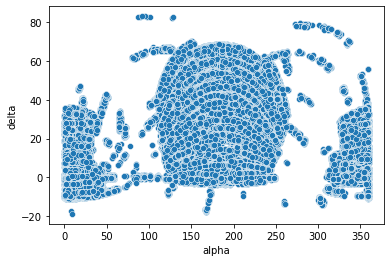

In [ ]:
sns.scatterplot(x='alpha',y='delta',data=data)

# Neural Network

In [ ]:
df = pd.get_dummies(data, columns=['class'])
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class_GALAXY,class_QSO,class_STAR
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171,1,0,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427,1,0,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299,1,0,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775,1,0,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,0.000000,9374,57749,438,1,0,0
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,0.404895,7626,56934,866,1,0,0
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,0.143366,2764,54535,74,1,0,0
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,0.455040,6751,56368,470,1,0,0


In [ ]:
data['cgs_int'] = data.class_g_s.map({'GALAXY':1, 'STAR':0})

In [ ]:
data_wo_id = data[{'alpha','delta','u','g','r','i','z','redshift','plate','MJD','cgs_int'}]
data_wo_id

In [ ]:
train_data= data_wo_id.head(70000)
test_data= data_wo_id.tail(30000)

Model 1

In [ ]:
x= data_wo_id.drop(["cgs_int"], axis=1)
y= data_wo_id['cgs_int']
x.head

<bound method NDFrame.head of          MJD         g         r         u         i         z  plate  \
0      56354  22.27530  20.39501  23.87882  19.16573  18.79371   5812   
1      58158  22.83188  22.58444  24.77759  21.16812  21.61427  10445   
2      55592  22.66389  20.60976  25.26307  19.34857  18.94827   4576   
3      58039  23.77656  21.61162  22.13682  20.50454  19.25010   9149   
4      56187  17.58028  16.49747  19.43718  15.97711  15.54461   6121   
...      ...       ...       ...       ...       ...       ...    ...   
81034  57749  22.97586  21.90404  22.16759  21.30548  20.73569   9374   
81035  56934  22.38628  20.45003  22.69118  19.75759  19.41526   7626   
81036  54535  19.26997  18.20428  21.16916  17.69034  17.35221   2764   
81037  56368  21.63757  19.91386  25.35039  19.07254  18.62482   6751   
81038  57104  21.79745  20.60115  22.62171  20.00959  19.28075   7410   

           delta       alpha  redshift  
0      32.494632  135.689107  0.634794  
1      31.2

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

36198    1
76457    0
8700     0
25768    1
2245     1
        ..
74481    1
19373    0
19490    0
44161    0
23686    0
Name: cgs_int, Length: 24312, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([     tf.keras.layers.Dense(10, activation='relu'),
                            tf.keras.layers.Dense(7, activation='relu'),
                            tf.keras.layers.Dense(5, activation='relu'),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])

# STEP2: Compiling the model

model.compile(loss= tf.keras.losses.binary_crossentropy,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics= [tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        ])

# STEP3: Fit the model

h= model.fit(x_train, y_train, epochs=200 ,verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

760/760 [==============================] - 1s 1ms/step - loss: 0.5785 - accuracy: 0.7347


[0.5785447359085083, 0.7346988916397095]

Text(0, 0.5, 'Loss & Accuracy')

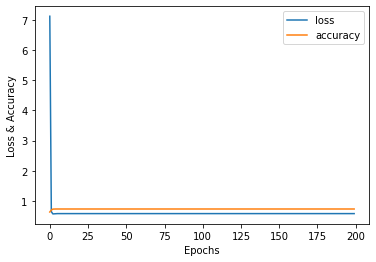

In [ ]:
pd.DataFrame(h.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                180       
                                                                 
 dense_13 (Dense)            (None, 7)                 77        
                                                                 
 dense_14 (Dense)            (None, 5)                 40        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


## Different models with it's output 

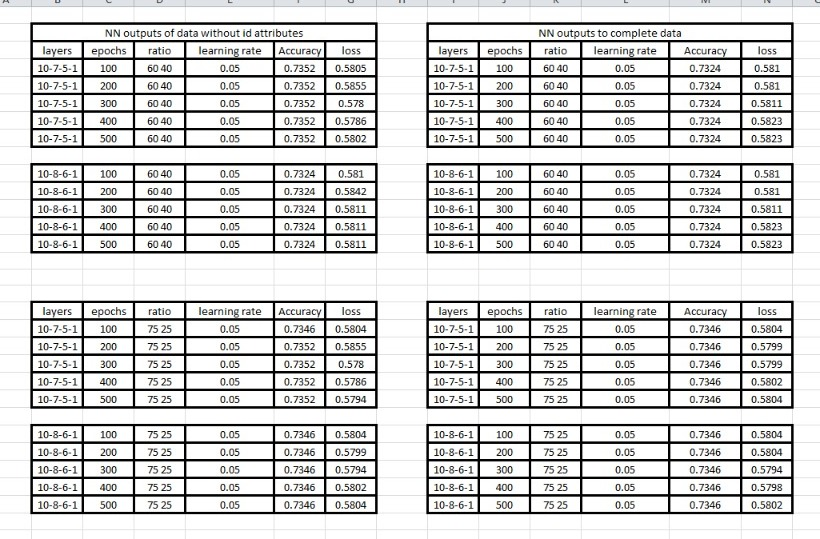

# LOGISTIC REGRESSION

In [ ]:
x = data.drop(['cgs_int','class_g_s'],axis=1)
y = data['cgs_int']

In [ ]:
os = SMOTE(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .7)

In [ ]:
columns = x_train.columns

In [ ]:
data_X,data_y=os.fit_resample(x_train, y_train)
data_X = pd.DataFrame(data=data_X,columns=columns )
data_y= pd.DataFrame(data=data_y,columns=['cgs_int'])

In [ ]:
data_vars=data.columns.values.tolist()
y=['cgs_int']
X=[i for i in data if i not in y]

In [ ]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(data_X, data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False False False  True  True False False
  True False  True  True  True]
[ 1  1  2  6  8  5  4  7  1  1 10  3  1  9  1  1  1]


In [ ]:
x.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift', 'plate',
       'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
log_reg = ['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID']
X=data_X[log_reg]
y=data_y['cgs_int']

In [ ]:
import statsmodels.api as sm

In [ ]:
x = data.drop(['cgs_int','class_g_s'],axis=1)
y = data['cgs_int']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .7)

In [ ]:
lreg = LogisticRegression()

In [ ]:
lreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred2 = lreg.predict(x_test)
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy_score(y_test,pred2)*100

26.480750246791708

# other just a try

In [ ]:
!git clone https://github.com/INRIA/scikit-learn-mooc

Cloning into 'scikit-learn-mooc'...
remote: Enumerating objects: 52858, done.
remote: Counting objects: 100% (2005/2005), done.
remote: Compressing objects: 100% (788/788), done.
remote: Total 52858 (delta 1130), reused 1879 (delta 1036), pack-reused 50853
Receiving objects: 100% (52858/52858), 320.51 MiB | 29.55 MiB/s, done.
Resolving deltas: 100% (41025/41025), done.


In [ ]:
!cp -r scikit-learn-mooc/python_scripts/helpers.

cp: missing destination file operand after 'scikit-learn-mooc/python_scripts/helpers.'
Try 'cp --help' for more information.


In [ ]:
from helpers.plotting import DecisionBoundaryDisplay

ModuleNotFoundError: ignored

In [ ]:
!gdown --id 19u9ILCKxcD-t2jYr_eHj_Soo3wjVIl6r

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=19u9ILCKxcD-t2jYr_eHj_Soo3wjVIl6r
To: /content/penguins_classification.csv
100% 6.40k/6.40k [00:00<00:00, 7.44MB/s]


In [ ]:
obv_columns = ['obj_ID','alpha','delta','u','g','r','i','z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID']
target_column = "class_g_s"

In [ ]:
dep, target = data[obv_columns], data[target_column]

In [ ]:
palette = ["tab:red", "tab:blue", "black"]

In [ ]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(dep, target)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [ ]:
target_predicted = tree.predict(dep)
misclassified_samples_idx = np.flatnonzero(target != target_predicted)
data_misclassified = data.iloc[misclassified_samples_idx]

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

ImportError: ignored

In [ ]:
for boosting_round, tree in enumerate(adaboost.estimators_):
    plt.figure()
    # we convert `data` into a NumPy array to avoid a warning raised in scikit-learn
    DecisionBoundaryDisplay.from_estimator(
        tree, data.to_numpy(), response_method="predict", cmap="RdBu", alpha=0.5
    )
    sns.scatterplot(x=obv_columns[0], y=obv_columns[1],
                    hue=target_column, data=data,
                    palette=palette)
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    _ = plt.title(f"Decision tree trained at round {boosting_round}")

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
!python --version

Python 3.9.14


In [ ]:
#install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2


Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 Packages [2,322 kB]
Hit:13 http://ppa.launchpad.